## Regresión lineal

In [1]:
import pandas as pd
import numpy as np

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [3]:
df = pd.read_csv('datos/USA_Housing.csv')

In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [11]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [12]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [16]:
sns.pairplot(df)

In [17]:
# Estudiamos un poco la distribución del precio. Apreciamos que tiene una distribución normal

sns.distplot(df['Price'])

In [11]:
# Vamos inspeccionar la correlación que existe entre las variables (-1 o 1 máxima correlación)

df.corr()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


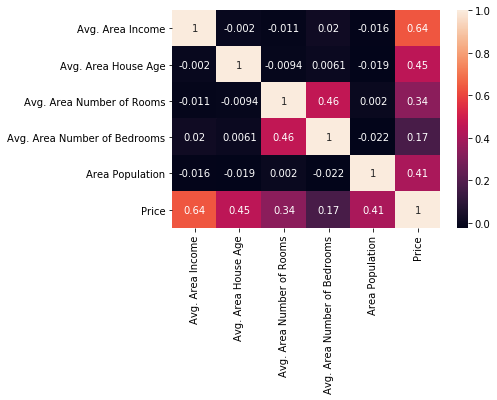

In [12]:
# Correlación por mapa de calor

sns.heatmap(df.corr(), annot=True)

In [13]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [14]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [15]:
# predict
y = df['Price']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [18]:
# Vamos a entrenar el modelo

from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()

In [20]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
print(lm.intercept_)

-2640159.7968526776


In [22]:
# Estudiamos los coeficientes de la regresión 

lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [23]:
X.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [25]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

In [26]:
cdf

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


Interpretando los coeficientes:

- Manteniendo todas las otras características fijas, un aumento de 1 unidad en **Avg. Area Income** es asociado con un **incremento de  \$21.52 **.
- Manteniendo todas las otras características fijas, un aumento de 1 unidad en **Avg. Area House Age** es asociado con un **incremento de \$164883.28 **.
- Manteniendo todas las otras características fijas, un aumento de 1 unidad en **Avg. Area Number of Rooms** s asociado con un **incremento de \$122368.67 **.
- Manteniendo todas las otras características fijas, un aumento de 1 unidad en **Avg. Area Number of Bedrooms** s asociado con un **incremento de \$2233.80 **
- Manteniendo todas las otras características fijas, un aumento de 1 unidad en **Area Population** s asociado con un **incremento de \$15.15 **.

Esto no tiene mucho sentido, porque no se trata de un dataset real. 

## PREDICTIONS

In [27]:
prediciones = lm.predict(X_test) 

In [28]:
prediciones

array([1260960.70567627,  827588.75560329, 1742421.24254344, ...,
        372191.40626917, 1365217.15140899, 1914519.5417888 ])

In [29]:
y_test

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
2866    7.300436e+05
2371    1.166925e+06
2952    7.054441e+05
45      1.499989e+06
4653    1.288199e+06
891     1.441737e+06
3011    1.279681e+06
335     1.754969e+06
3050    1.511653e+06
3850    1.441956e+06
834     1.119993e+06
3188    7.278665e+05
4675    1.138885e+06
2564    1.074263e+06
1866    1.386473e+06
1492    4.046436e+05
3720    1.449829e+06
618     1.775875e+06
3489    1.202051e+06
2145    1.105737e+06
3200    1.835565e+06
4752    1.795429e+06
602     1.424283e+06
4665    1.365945e+06
79      1.492011e+06
            ...     
4668    1.537865e+06
3762    4.269062e+05
236     8.090897e+05
4897    1.169265e+06
1283    9.809832e+05
2443    5.491679e+05
3600    8.238644e+05
2138    1.467960e+06
254     8.224317e+05
3987    1.550931e+06
527     1.293747e+06
1362    7.582626e+05
4577    1.479063e+06
2642    1.759180e+06
4297    1.864670e+06
1114    1.569122e+06
1041    1.610

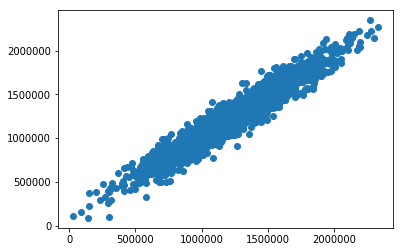

In [30]:
plt.scatter(y_test, prediciones)

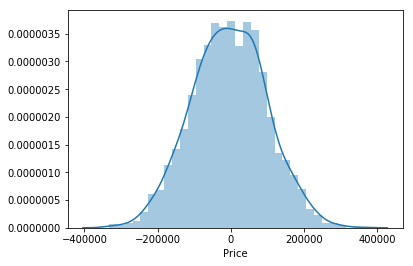

In [32]:
# distribución de los residuos

sns.distplot((y_test - prediciones))

# vemos que sigue una distribución normal, esto nos da la pista que hemos seleccionado un buen modelo para los datos

## Métricas de evaluación de regresión


Tres métricas comunes para problemas de regresión:

**Mean Absolute Error** (MAE) o error absoluto medio. Es la media del valor absoluto de los errores:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) o error medio cuadrado. Es la media de los cuadrados de los errores:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) Es la raíz cuadrada de la media de los cuadrados de los errores:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparando estas métricas:

- **MAE** es la más fácil de entender porque es simplemente la media del error.
- **MSE** es más popular que MAE, porque MSE "castiga" errores más grandes, lo que tiende a ser útil en el mundo real.
- **RMSE** es aún más popular que MSE, porque RMSE es interpretable en las unidades "y"

Todas éstas son  **funciones de pérdida**, porque queremos minimizarlas

In [34]:
from sklearn import metrics


In [35]:
metrics.mean_absolute_error(y_test, prediciones)

82288.22251914951

In [36]:
metrics.mean_squared_error(y_test, prediciones)

10460958907.208996

In [37]:
np.sqrt(metrics.mean_squared_error(y_test, prediciones))

102278.82922290906